<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/intro/iris_classification_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.set_printoptions(precision=2)

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target    #150 examples in total, y=0 setosa, y=1 versicolor, y=2 virginica

numclasses=len(iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state=5, stratify=y)

In [2]:
# Combine features and class labels
data_with_labels = np.c_[X, y]

# Print header
print(iris.feature_names + ['class-label'])

# Print combined data
for row in data_with_labels:
    print(row)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class-label']
[5.1 3.5 1.4 0.2 0. ]
[4.9 3.  1.4 0.2 0. ]
[4.7 3.2 1.3 0.2 0. ]
[4.6 3.1 1.5 0.2 0. ]
[5.  3.6 1.4 0.2 0. ]
[5.4 3.9 1.7 0.4 0. ]
[4.6 3.4 1.4 0.3 0. ]
[5.  3.4 1.5 0.2 0. ]
[4.4 2.9 1.4 0.2 0. ]
[4.9 3.1 1.5 0.1 0. ]
[5.4 3.7 1.5 0.2 0. ]
[4.8 3.4 1.6 0.2 0. ]
[4.8 3.  1.4 0.1 0. ]
[4.3 3.  1.1 0.1 0. ]
[5.8 4.  1.2 0.2 0. ]
[5.7 4.4 1.5 0.4 0. ]
[5.4 3.9 1.3 0.4 0. ]
[5.1 3.5 1.4 0.3 0. ]
[5.7 3.8 1.7 0.3 0. ]
[5.1 3.8 1.5 0.3 0. ]
[5.4 3.4 1.7 0.2 0. ]
[5.1 3.7 1.5 0.4 0. ]
[4.6 3.6 1.  0.2 0. ]
[5.1 3.3 1.7 0.5 0. ]
[4.8 3.4 1.9 0.2 0. ]
[5.  3.  1.6 0.2 0. ]
[5.  3.4 1.6 0.4 0. ]
[5.2 3.5 1.5 0.2 0. ]
[5.2 3.4 1.4 0.2 0. ]
[4.7 3.2 1.6 0.2 0. ]
[4.8 3.1 1.6 0.2 0. ]
[5.4 3.4 1.5 0.4 0. ]
[5.2 4.1 1.5 0.1 0. ]
[5.5 4.2 1.4 0.2 0. ]
[4.9 3.1 1.5 0.2 0. ]
[5.  3.2 1.2 0.2 0. ]
[5.5 3.5 1.3 0.2 0. ]
[4.9 3.6 1.4 0.1 0. ]
[4.4 3.  1.3 0.2 0. ]
[5.1 3.4 1.5 0.2 0. ]
[5.  3.5 1.3 0.3 0. ]


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
mytest_flower = [6, 3, 4, 4]
print('What is the predicted class label for', mytest_flower, '?')

What is the predicted class label for [6, 3, 4, 4] ?


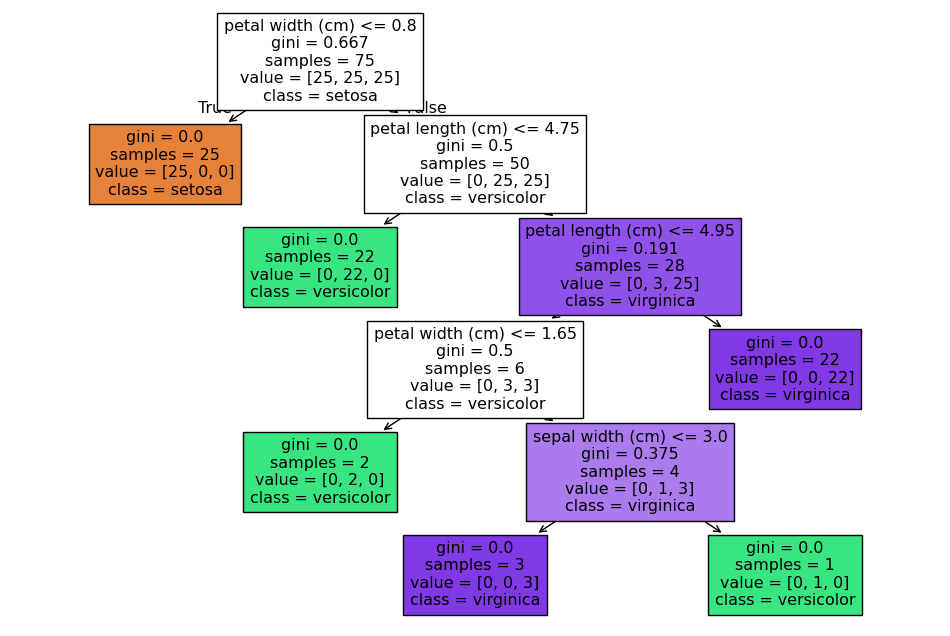

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names,)
plt.show()

In [6]:
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

predicted_class = clf.predict([mytest_flower])
predicted_class = predicted_class[0]   #we have a single test example here, pick that integer from the list
print('Predicted class label for', mytest_flower, 'is', iris.target_names[predicted_class])

Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Predicted class label for [6, 3, 4, 4] is versicolor


In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96

In [9]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96